<h1>¿Influyen la cantidad de reviews en la calificación de un libro?</h1>

No se requiere ser bibliomano para poder recomendar un libro que nos haya gustado, pero si el gusto es relativo, ¿podrá ser que a alguien no le guste el mismo libro que a mí me inspiro a ser mejor persona? Claro que sí, es muy probable que al menos a una persona no le guste. Eso no quiere decir que los gustos se dividan entre "lo amé" y "lo odié", como todo en la vida, es bueno tener matices. La escala de 5 estrellas es una muy conocida, dónde 0 es un rotundo "no lo recomiendo", 3 se puede entender como un "bueno, pero no el mejor" y 5 "excelente". Brindándole a la gente estos matices, podemos obtener más información, así como nuevas preguntas, dónde la más importante podría ser: ¿Mientras más gente lea un libro, más difícil será alcanzar las 5 estrellas?

Con el Dataset de esta página, se plantea hacer un estudio estadístico sobre la relación que tiene el promedio de calificación en un rating de 5 estrellas ('average_rating') y las reseñas que ha recibido el libro ('text_reviews_coun'), suponiendo que todas las reseñas recibidas han sido hechas por gente que leyó el libro.

<h1>Read Data</h1>

Desde un punto inicial se poceden a importar las librerías del set básico para analizar un DataFrame de Pandas, gráficas y arreglos

In [206]:
import scipy.stats
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [207]:
books = pd.read_csv('books.csv')
books.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,Unnamed: 12
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.,NaN
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,439358078,9780439358071,eng,870,2153167,29221,09/01/2004,Scholastic Inc.,NaN
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,439554896,9780439554893,eng,352,6333,244,11/01/2003,Scholastic,NaN
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,05/01/2004,Scholastic Inc.,NaN
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic,NaN


In [208]:
books.columns

Index(['bookID', 'title', 'authors', 'average_rating', 'isbn', 'isbn13',
       'language_code', '  num_pages', 'ratings_count', 'text_reviews_count',
       'publication_date', 'publisher', 'Unnamed: 12'],
      dtype='object')

Al observar la tabla, se puede apreciar que existe una columna de "sobra". Ya que existe la posibilidad de que se haya cometido un error en tanto en el título como en los autores, se hará un análisis superficial sobre la columna de 'average_rating', al ser la más cercana (en este caso) a la causas del error y de relevancia para el estudio.

In [209]:
try:
    x = books['average_rating'].apply(lambda x: 'rating' + str(float(x)))
except ValueError as e:
    print(e)

could not convert string to float: ' Jr./Sam B. Warner'


El error nos está mos estrá mostrando que el error es en la columna de autores. Ya que se realizará un estudio sobre la relación entre el rating y las reviews, podemos precindir (por el momento) de información como el idioma, la editorial o la fecha. Por ello, se cargará solo la información relevante conforme sea requerida.

<h1>Carga de la información y análisis de la información</h1>

<h2>Delimitación de la información necesaria</h2>

Haciendo un análisis superficial, solo se requerirá la información del rating (float), reviews (int) y los libros resultantes de estos análisis. En el caso del rating y las reviews, podemos notar que un parámetro siempre solicitado es el valor máximo. Por lo que al momento de cargar la información, podemos aprovechar para obtenerlo dentro del mismo ciclo. Si el lector desea agregar más información, a continuación se deja el chunk de la función load_and_max para su edición.

Para este chunk, cape resaltar que se requerirá de las siguientes librerías:

In [210]:
import csv, os
from datetime import datetime

In [211]:
def load_and_max(file, column_to_find):
    with open(books, mode="r", encoding='utf-8', newline='') as csv_file:
        csv_reader = csv.reader(csv_file)
        
        header = next(csv_reader)
        column_array = []
        max_value = 0

        for row in csv_reader:
            try:
                last_row = row[12]
                if last_row == '':
                    last_row = row[13]

                if column_to_find == 'average_rating': column_data = float(row[4])
                elif column_to_find == 'num_pages': column_data = int(row[8])
                elif column_to_find == 'ratings_count': column_data = int(row[9])
                elif column_to_find == 'text_reviews_count': column_data = int(row[10])
                else:
                    column_array = 'Data not Found. Check input'
                    max_value = 0
                    return column_array, max_value
            except IndexError:
                if column_to_find == 'average_rating': column_data = float(row[3])
                elif column_to_find == 'num_pages': column_data =  int(row[7])
                elif column_to_find == 'ratings_count': column_data = int(row[8])
                elif column_to_find == 'text_reviews_count': column_data = int(row[9])
                else:
                    column_array = 'Data not Found. Check input'
                    max_value = 0
                    return column_array, max_value

            column_array.append(column_data)
            if column_data > max_value:
                max_value = column_data

    csv_file.close()

    return column_array, max_value

Para el caso de los títulos, se usaría solo la carga del array, sin un análisis requerido por el momento. Se resalta que este sería el sistema de carga para cualquiera de los arrays de forma individual.

In [212]:
def load_array(file, column_to_find):

    with open(books, mode="r", encoding='utf-8', newline='') as csv_file:
        csv_reader = csv.reader(csv_file)
        header = next(csv_reader)
        column_array = []

        for row in csv_reader:
            try:
                last_row = row[12]
                if last_row == '':
                    last_row = row[13]
                #Ordered followinf the fild
                #First Strings
                if column_to_find == 'title': column_data = row[1]
                elif column_to_find == 'authors': column_data = row[2] + ',' + row[3]
                #Float
                elif column_to_find == 'average_rating': column_data = float(row[4])
                #Strings hided as Int
                elif column_to_find == 'isbn': column_data = row[5]
                elif column_to_find == 'isbn13': column_data = row[6]
                #String AF
                elif column_to_find == 'language_code': column_data = row[7]
                elif column_to_find == '  num_pages': column_data = int(row[8])
                elif column_to_find == 'ratings_count': column_data = int(row[9])
                elif column_to_find == 'text_reviews_count': column_data = int(row[10])
                #Reason you import Datetime
                elif column_to_find == 'publication_date': column_data = datetime.strptime(row[11], '%m/%d/%Y')
                #String
                elif column_to_find == 'publisher': column_data = row[12]
                else:
                    column_data = 'Data not Found. Check input'
                    
                    return column_array

                    
            except IndexError:
                #Ordered followinf the fild
                #First Strings
                if column_to_find == 'title': column_data = row[1]
                elif column_to_find == 'authors': column_data = row[2]
                #Float
                elif column_to_find == 'average_rating': column_data = float(row[3])
                #Strings hided as Int
                elif column_to_find == 'isbn': column_data = row[4]
                elif column_to_find == 'isbn13': column_data = row[5]
                #String AF
                elif column_to_find == 'language_code': column_data = row[6]
                elif column_to_find == 'num_pages': column_data =  int(row[7])
                elif column_to_find == 'ratings_count': column_data = int(row[8])
                elif column_to_find == 'text_reviews_count': column_data = int(row[9])
                #Reason you import Datetime
                elif column_to_find == 'publication_date': column_data = datetime.strptime(row[10], '%m/%d/%Y')
                #String
                elif column_to_find == 'publisher': column_data = row[11]
                else:
                    column_data = 'Data not Found. Check input'
                    
                    return column_array

            column_array.append(column_data)
        

    csv_file.close()

    return column_array

Realizando por partes el código, procedemos a manejarlo cómo si fuera un script simple de python, obteniendo la ubicación de nuestro archivo y agreegando el nombre del mismo.

In [213]:
import csv, os
from datetime import datetime

In [214]:
cwd = os.getcwd()
books = os.path.join(cwd,'books.csv')

In [215]:
titles = load_array(books, 'title')
rating, max_rating = load_and_max(books, 'average_rating')
reviews, max_reviews = load_and_max(books, 'text_reviews_count')

Corroboramos que la información se haya cargado correctamente:

In [294]:
books_dict = {'rating': rating,
             'reviews': reviews,
             'titles': titles}

In [229]:
books_df = pd.DataFrame(books_dict, columns=['rating','reviews','titles'])
books_df

,rating,reviews,titles
0,4.57,27591,Harry Potter and the Half-Blood Prince (Harry ...
1,4.49,29221,Harry Potter and the Order of the Phoenix (Har...
2,4.42,244,Harry Potter and the Chamber of Secrets (Harry...
3,4.56,36325,Harry Potter and the Prisoner of Azkaban (Harr...
4,4.78,164,Harry Potter Boxed Set Books 1-5 (Harry Potte...
...,...,...,...
11122,4.06,20,Expelled from Eden: A William T. Vollmann Reader
11123,4.08,56,You Bright and Risen Angels
11124,3.96,95,The Ice-Shirt (Seven Dreams #1)
11125,3.72,139,Poor People


<h2>Primeras deducciones</h2>

Dado que tenemos rangos de existencia amplios y con tipos de variables distintos, se decide a realizar unos primeros análisis sobre las variables del Rating y de las Reviews de forma independiente.

<h3>Rating</h3>

Para el caso del rating se puede observar un comportamiento con tendencia a la derecha, indicando que resulta más fácil encontrar un valor cercano a las 4 estrellas, pero que, al obtenerlo, decrece de form más drástica. Lo que sí resulta extraño, es encontrar valores entre 0 y 2. A simple vista, parece que encontrar una calificación de 5 estrellas ("excelente") es igual de probable que una de 2 (parecido a "no lo recomiendo").

In [230]:
y = books_df['rating']

Con esto podemos ver cuál es la frecuencia en las calificaciones con un gráfico de barras:

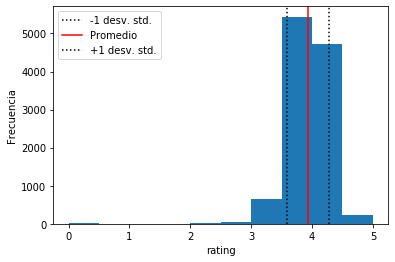

In [231]:
fig, ax = plt.subplots()
ax.hist(y, bins = 10)
ax.set_xlabel('rating')
ax.set_ylabel('Frecuencia')

plt.axvline(np.mean(y)-np.std(y), c = 'k', linestyle = ':', label = '-1 desv. std.')
plt.axvline(np.mean(y), c = 'r', linestyle = '-', label = 'Promedio')
plt.axvline(np.mean(y)+np.std(y), c = 'k', linestyle = ':', label = '+1 desv. std.')
ax.legend()

Con esa información, se procede a analizar cuales son los libros con mayor calificación (5 estrellas)

In [232]:
def match_case_condition(array, value):
    match_one_condition = []
    for element_ub in range(len(array)):
        if array[element_ub] == value:
            match_one_condition.append(element_ub)

    return match_one_condition

In [227]:
maxium_books = match_case_condition(rating,5)

verified_rate = []
for ub in maxium_books:
    verified_rate.append(rating[ub])

n_reviews_of_titles = []
for ub in maxium_books:
    n_reviews_of_titles.append(reviews[ub])    
    
best_rated_titles = []
for ub in maxium_books:
    best_rated_titles.append(titles[ub])
    
best_rated_books_dict = {'rating': verified_rate,
             'reviews': n_reviews_of_titles,
             'titles': best_rated_titles}

best_rated_books_df = pd.DataFrame(best_rated_books_dict, columns=['rating','reviews','titles'])
best_rated_books_df

,rating,reviews,titles
0,5.0,0,Comoediae 1: Acharenses/Equites/Nubes/Vespae/P...
1,5.0,0,Willem de Kooning: Late Paintings
2,5.0,1,Literature Circle Guide: Bridge to Terabithia:...
3,5.0,0,Middlesex Borough (Images of America: New Jersey)
4,5.0,0,Zone of the Enders: The 2nd Runner Official St...
5,5.0,3,The Diamond Color Meditation: Color Pathway to...
6,5.0,0,Bulgakov's the Master and Margarita: The Text ...
7,5.0,0,The Complete Theory Fun Factory: Music Theory ...
8,5.0,0,The Goon Show Volume 4: My Knees Have Fallen ...
9,5.0,0,The Goon Show Volume 11: He's Fallen in the W...


Con este análisis, podemos afirmar que es falsa la idea de que los libros mejor calificados son los que tienen el mayor número de lectores.

<h2>Considerando Rating y Reviews</h2>

Por la naturaleza de los reviews, clasificarlo sería algo más difícil. Ya que es menos probable de que entren en un rango fácil de clasificar.

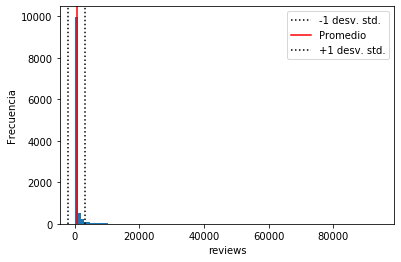

In [233]:
y = books_df['reviews']
fig, ax = plt.subplots()
ax.hist(y, bins = 100)
ax.set_xlabel('reviews')
ax.set_ylabel('Frecuencia')

plt.axvline(np.mean(y)-np.std(y), c = 'k', linestyle = ':', label = '-1 desv. std.')
plt.axvline(np.mean(y), c = 'r', linestyle = '-', label = 'Promedio')
plt.axvline(np.mean(y)+np.std(y), c = 'k', linestyle = ':', label = '+1 desv. std.')
ax.legend()

Se puede apreciar que es raro que la gente reseñe un libro, pero a su vez, sí existen valores altos de reseña. Ya que encontrarlos resultaría en una iteración manual, y que tenemos una noción de los resultados con el gráfico, podríamos obtener los libros que tengan como mínimo 1,000 reviews.

In [234]:
def merge_sort(array):
    if len(array) > 1:
        middle = len(array) // 2
        left = array[:middle]
        right = array[middle:]

        merge_sort(left)
        merge_sort(right)
        
        """SubArrays Iterators"""
        i = 0
        j = 0
        """MainArray Iterator"""
        k = 0

        while i < len(left) and j < len(right):
            if left[i] < right[j]:
                array[k] = left[i]
                i += 1
            else:
                array[k] = right[j]
                j += 1
            
            k += 1

        while i < len(left):
            array[k] = left[i]
            i += 1
            k += 1

        while j < len(right):
            array[k] = right[j]
            j += 1
            k += 1

    return array

def binary_search(array, start, end, search_value):
    if start > end:
        return end
    
    middle = (start + end) // 2

    if array[middle] == search_value:
        return middle
    elif array[middle] < search_value:
        return binary_search(array, middle + 1, end, search_value)
    else:
        return binary_search(array, start, middle - 1, search_value)

    
def top_condisioned(array, start_value):
    helper_array = sorted_set(array.copy())
    helpers_end = len(helper_array) - 1
    ubication =  binary_search(helper_array, 0, helpers_end, start_value)
    
    top_condisioned = []
    for i in range(ubication, helpers_end):
        top_condisioned.append(helper_array[i])

    return top_condisioned

def counted_array(elements_to_count, original_array):
    count_array = []
    for value in range(len(elements_to_count)):
        count_array.append(original_array.count(elements_to_count[value]))
    
    return count_array

def sorted_set(array):
    reduced_set = set(array)
    reduced_array = []
    for element in reduced_set:
        reduced_array.append(element)
    reduced_array = merge_sort(reduced_array)

    return reduced_array

In [297]:
topc_reviews = top_condisioned(reviews, 1000)
len(topc_reviews)

951

Ya que se pudo apreciar que existe un rango considerable de calificaciones mayores a 4, podemos reducir el espectro aplicando la misma lógica para el rating de los libros

In [298]:
topc_rating = top_condisioned(rating, 4.5)
len(topc_rating)

31

Cómo se puede apreciar, la diferencia en tamaño de arrays es muy grande. Por lo que encontrar un caso en el que coincidan las mejores calificaciones con el mayor número de reviews nos podría otorgar una Frame más reducido.

In [237]:
def match_cases(array1, wanted_array1, array2, wanted_array2):
    """Notice de diference: the original data has to be of the samen lenght,
    BUT the match cases can differ. This means that I can have 3 match cases
    on one side and 50 in the other, and it won't make any trouble"""
    if len(array1)==len(array2):
        match_cases = []

        #Creating Support dictionaries
        wanted_cases_1 = {}
        for data in range(len(wanted_array1)):
            wanted_cases_1[wanted_array1[data]] = 1
        
        wanted_cases_2 = {}
        for data in range(len(wanted_array2)):
            wanted_cases_2[wanted_array2[data]] = 1
        
        for ub in range(len(array1)):
            val1 = array1[ub]
            val2 = array2[ub]
            if val1 in wanted_cases_1 and val2 in wanted_array2:
                match_cases.append(ub)
            
        return match_cases

    else: return 'Arrays must have the samen lenght'

In [238]:
match_cases = match_cases(rating, topc_rating, reviews, topc_reviews)
match_cases

[0, 3, 21, 288, 335, 4245, 6694]

Como se puede apreciar, son pocos los casos. Por lo que podríamos llamarlos "los mejor evaluados" (bv) al tener buen puntaje y una cantidad considerable de reviews.

In [244]:
bv_rate = []
for ub in match_cases:
    bv_rate.append(rating[ub])

bv_reviews = []
for ub in match_cases:
    bv_reviews.append(reviews[ub])    
    
bv_titles = []
for ub in match_cases:
    bv_titles.append(titles[ub])
    
bv_books_dict = {'rating': bv_rate,
             'reviews': bv_reviews,
             'titles': bv_titles}

bv_books_df = pd.DataFrame(bv_books_dict, columns=['rating','reviews','titles'])
bv_books_df

,rating,reviews,titles
0,4.57,27591,Harry Potter and the Half-Blood Prince (Harry ...
1,4.56,36325,Harry Potter and the Prisoner of Azkaban (Harr...
2,4.59,1550,J.R.R. Tolkien 4-Book Boxed Set: The Hobbit an...
3,4.50,1427,Fullmetal Alchemist Vol. 1 (Fullmetal Alchemi...
4,4.51,1237,The Power Broker: Robert Moses and the Fall of...
5,4.55,5966,The Complete Maus
6,4.54,1038,Season of Mists (The Sandman #4)


Ordenando los valores según la columna de reviews, podremos obtener el libro con mayor número de reviews y que tenga una calificación mayor a 4.5. Considerándolo por ende, uno de los mejores libros calificados en este Data Set

In [246]:
bv_books_df.sort_values(by = 'reviews', ascending = False)

,rating,reviews,titles
1,4.56,36325,Harry Potter and the Prisoner of Azkaban (Harr...
0,4.57,27591,Harry Potter and the Half-Blood Prince (Harry ...
5,4.55,5966,The Complete Maus
2,4.59,1550,J.R.R. Tolkien 4-Book Boxed Set: The Hobbit an...
3,4.50,1427,Fullmetal Alchemist Vol. 1 (Fullmetal Alchemi...
4,4.51,1237,The Power Broker: Robert Moses and the Fall of...
6,4.54,1038,Season of Mists (The Sandman #4)


<h3>Caso contrario. Solo considerar Reviews</h3>

La siguiente función fue diseñada para obtener el "top" deseado de una serie de elementos numéricos. Por lo que con esto podrías observar cómo hubiese sido la tabla si solo se hubiesen considerado los 7 valores más altos en reviews. Este número fue escogido por la cantidad de coincidencias obtenidas para el DataFrame anterior.

In [248]:
def topx(array, top_size):
    """Considerations.
    1) Array is ORDERED from minor to major.
    2) You can insert Arrays with duplicated values.
    3) You won't insert Sets."""

    sorted_and_reduced_array = sorted_set(array.copy())
    position = len(sorted_and_reduced_array) - 1
    
    topx = []
    value = sorted_and_reduced_array[position]
    topx.append(value)

    position -= 1
    max_value = value
    value = sorted_and_reduced_array[position]

    top_values = 1 

    while top_values < top_size and position >= 0 :
        if value != max_value:
            topx.append(sorted_and_reduced_array[position])
            max_value = value
            top_values += 1
        position -= 1
        value = sorted_and_reduced_array[position]

    return topx

In [254]:
top7_reviews = topx(reviews, 7)
top7_reviews

[94265, 86881, 56604, 55843, 52759, 47951, 47620]

In [257]:
def match_top_cases(array1, wanted_array1):
        match_cases = []

        #Creating Support dictionaries
        wanted_cases_1 = {}
        for data in range(len(wanted_array1)):
            wanted_cases_1[wanted_array1[data]] = 1
        
        for ub in range(len(array1)):
            val1 = array1[ub]
            if val1 in wanted_cases_1:
                match_cases.append(ub)
            
        return match_cases

In [258]:
ub_top7r = match_top_cases(reviews, top7_reviews)
ub_top7r

[284, 1069, 5272, 5409, 7312, 10340, 10704]

In [252]:
def array_matches(match_array, array1, array2, array3):
    
    match_array1 = []
    for ub in match_array:
        match_array1.append(array1[ub])

    match_array2 = []
    for ub in match_array:
        match_array2.append(array2[ub])    

    match_array3 = []
    for ub in match_array:
        match_array3.append(array3[ub])
    
    return match_array1,match_array2,match_array3

In [260]:
t7rev_rating, t7rev_reviews, t7rev_titles = array_matches(ub_top7r, rating, reviews, titles)
    
top7_books_dict = {'rating': t7rev_rating,
             'reviews': t7rev_reviews,
             'titles': t7rev_titles}

top7_books_df = pd.DataFrame(top7_books_dict, columns=['rating','reviews','titles'])
top7_books_df.sort_values(by = 'reviews', ascending = False)

,rating,reviews,titles
5,3.59,94265,Twilight (Twilight #1)
2,4.37,86881,The Book Thief
1,4.13,56604,The Giver (The Giver #1)
0,3.86,55843,The Alchemist
6,4.09,52759,Water for Elephants
4,4.25,47951,The Lightning Thief (Percy Jackson and the Oly...
3,3.55,47620,Eat Pray Love


Aquí se puede apreciar que no siempre se garantiza una buena calificación con un gran número de reseñas.

<h2>Comportamiento rating vs reviews</h2>

Debido a los resultados anteriores, se decide implementar un gráfico de puntos "rating vs reviews".

In [267]:
books_df

,rating,reviews,titles
0,4.57,27591,Harry Potter and the Half-Blood Prince (Harry ...
1,4.49,29221,Harry Potter and the Order of the Phoenix (Har...
2,4.42,244,Harry Potter and the Chamber of Secrets (Harry...
3,4.56,36325,Harry Potter and the Prisoner of Azkaban (Harr...
4,4.78,164,Harry Potter Boxed Set Books 1-5 (Harry Potte...
...,...,...,...
11122,4.06,20,Expelled from Eden: A William T. Vollmann Reader
11123,4.08,56,You Bright and Risen Angels
11124,3.96,95,The Ice-Shirt (Seven Dreams #1)
11125,3.72,139,Poor People


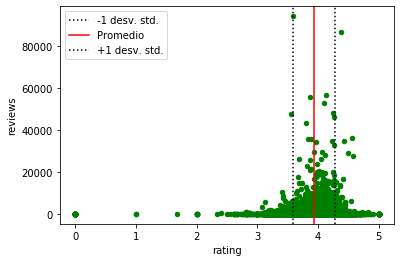

In [293]:
fig = books_df.plot(kind="scatter", x = 'rating', y = 'reviews',c = 'green')
plt.axvline(np.mean(x)-np.std(x), c = 'k', linestyle = ':', label = '-1 desv. std.')
plt.axvline(np.mean(x), c = 'r', linestyle = '-', label = 'Promedio')
plt.axvline(np.mean(x)+np.std(x), c = 'k', linestyle = ':', label = '+1 desv. std.')
fig.legend()

Este gráfico presenta una condensación de los puntos entre una calificación de 3.5 y 4.5 y menores a 20,000 reviews. Para el caso de libros mayores a 4.5 podemos observar que no existe un repunte ni libros que traspasen dicho rango, pero sí que los puntos con mayor número de reviews se encuentran igual en dicho rango.

<h1>Conclusiones</h1>

<ol>
<li>Un libro tenga una calificación de 5 estrellas no es garantía de que a mucha gente le haya parecido un libro excelente</li>
<li>Que un libro haya sido leído por mucha gente, no garantiza que a todos les haya parecido un libro excelente</li>
<li>Siempre hay que considerar todas las variables disponibles y relevantes de un Data Set</li>
<li>Conforme más condiciones agreguemos a nuestros análisis, nuestras deducciones pueden ser más precisas y objetivas</li>
</ol>